In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:, 3:5].values


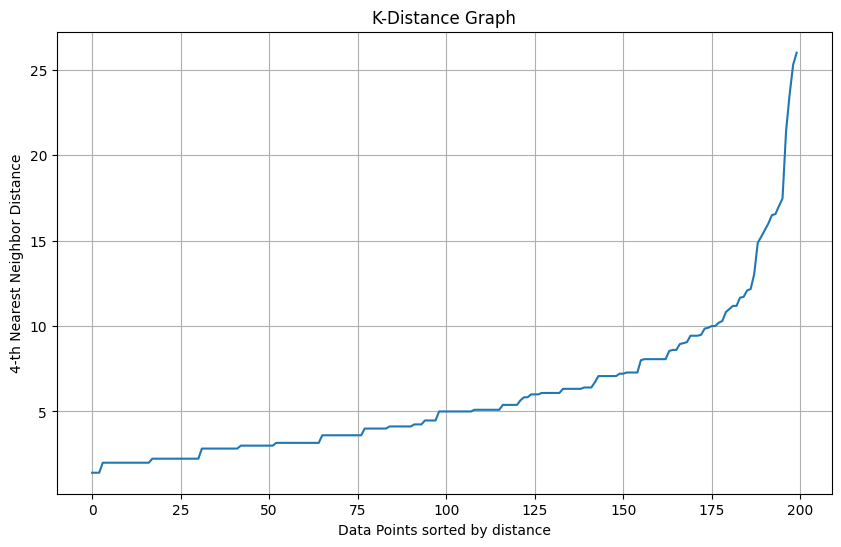

In [4]:

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# The value for k (min_samples)
k = 4

# Create a NearestNeighbors model to find the k-th nearest neighbors
# The 'kd_tree' algorithm is efficient for this task
neighbors = NearestNeighbors(n_neighbors=k, algorithm='kd_tree')
neighbors_fit = neighbors.fit(X)

# Get the distances and indices of the neighbors
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances and plot them
# We are interested in the distance to the k-th neighbor, which is the last column
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [5]:
# I chose the  eps value from the elbow graph above corresponding to y axis to calculate more number of Clusters
# I tried with eps between 10 t0 15 and found that eps=12 , gave Estimated number of clusters: 5 when eps=14 stimated number of clusters became 2, 
# so going with eps=13 below,
# Conclusion - # use of the K-distance graph from the previous step helped me to find the correct eps value ,using that i was able find more number of clusters

from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=12, min_samples=10).fit(X)
y_DB=db.fit_predict(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 28


In [6]:
y_DB

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0,  2,  2,  2,  0,  1,  0,  1,  0,
       -1,  0, -1,  0,  2,  0,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=y_DB
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [8]:
supervised.to_csv("cluster.csv",index=False)

C:\Users\gssan\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


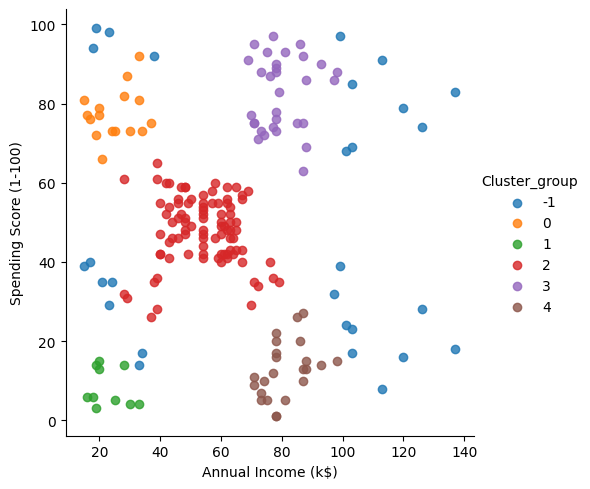

In [9]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

In [10]:
#Data generation
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

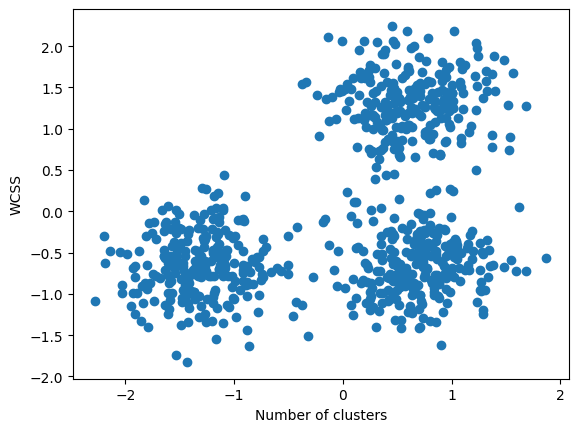

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()